In [38]:
import pandas as pd

df = pd.read_json('/Users/loic.doerr/dev/ny-emergency-ai/rawData/fire-incidents/interims.json')

df.head()

,starfire_incident_id,incident_datetime,alarm_box_borough,alarm_box_number,alarm_box_location,incident_borough,zipcode,policeprecinct,citycouncildistrict,communitydistrict,...,first_activation_datetime,incident_close_datetime,valid_dispatch_rspns_time_indc,valid_incident_rspns_time_indc,incident_response_seconds_qy,incident_travel_tm_seconds_qy,engines_assigned_quantity,ladders_assigned_quantity,other_units_assigned_quantity,first_on_scene_datetime
0,2100404460110002,2021-01-04T00:01:00.000,MANHATTAN,446,3 AVE & ST. MARKS PL,MANHATTAN,10003.0,9.0,2.0,103.0,...,2021-01-04T00:02:00.000,2021-01-04T00:07:00.000,N,N,0.0,0.0,1,0,0,NaN
1,2100433250140001,2021-01-04T00:01:00.000,BROOKLYN,3325,AVENUE O & E 13 ST,BROOKLYN,11230.0,70.0,48.0,314.0,...,2021-01-04T00:02:00.000,2021-01-04T00:32:00.000,N,Y,170.0,165.0,1,0,0,2021-01-04T00:04:00.000
2,2100411280150003,2021-01-04T00:01:00.000,QUEENS,1128,MOTT AVE & DICKENS ST,QUEENS,11691.0,101.0,31.0,414.0,...,2021-01-04T00:02:00.000,2021-01-04T00:05:00.000,N,N,0.0,0.0,1,0,0,NaN
3,2100416590110004,2021-01-04T00:02:00.000,MANHATTAN,1659,BROADWAY & 153 ST,MANHATTAN,10031.0,30.0,7.0,109.0,...,2021-01-04T00:02:00.000,2021-01-04T00:31:00.000,N,Y,318.0,314.0,1,0,0,2021-01-04T00:07:00.000
4,2100413490110006,2021-01-04T00:02:00.000,MANHATTAN,1349,5 AVE & 112 ST,MANHATTAN,10026.0,28.0,9.0,110.0,...,2021-01-04T00:03:00.000,2021-01-04T00:18:00.000,N,Y,871.0,834.0,1,0,0,2021-01-04T00:17:00.000


In [39]:
df = df[['incident_classification', 'incident_classification_group']].value_counts()

df = df.reset_index(name='quantity')

df.head(20)

,incident_classification,incident_classification_group,quantity
0,Medical - Breathing / Ill or Sick,Medical Emergencies,6849
1,Medical - EMS Link 10-91,Medical Emergencies,5091
2,Medical - PD Link 10-91,Medical Emergencies,2497
3,Assist Civilian - Non-Medical,NonMedical Emergencies,2078
4,Medical - No PT Contact EMS is Onscene,Medical Emergencies,1685
5,Elevator Emergency - Occupied,NonMedical Emergencies,1175
6,Alarm System - Testing,NonMedical Emergencies,1129
7,Odor - Other Than Smoke,NonMedical Emergencies,1002
8,Utility Emergency - Gas,NonMedical Emergencies,998
9,Utility Emergency - Water,NonMedical Emergencies,821


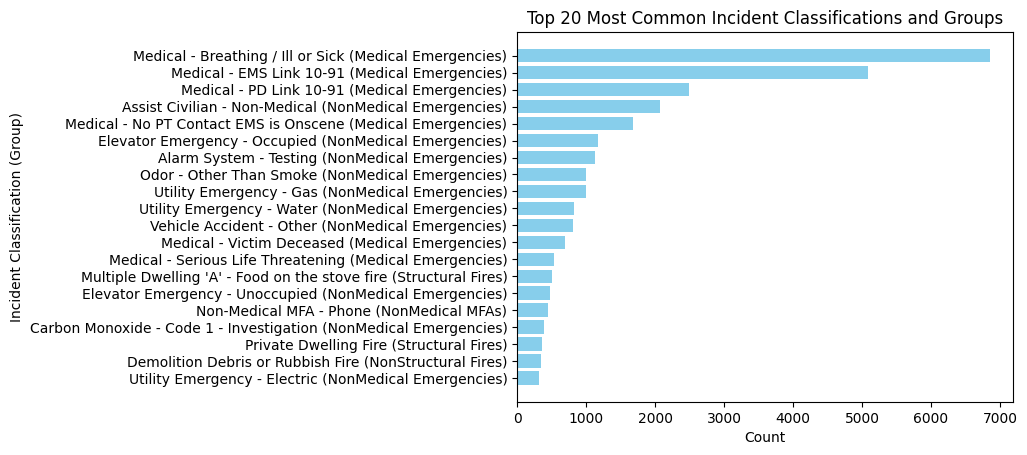

In [40]:
import matplotlib.pyplot as plt

df = df.head(20)

plt.barh(y=df.apply(lambda row: f"{row['incident_classification']} ({row['incident_classification_group']})", axis=1), width=df['quantity'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Incident Classification (Group)')
plt.title('Top 20 Most Common Incident Classifications and Groups')
plt.gca().invert_yaxis()
plt.show()